In [21]:
import regex as re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [22]:
def startsWithDateAndTime(s):
    patter = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(patter, s)
    if result:
        return True
    return False

<>:2: SyntaxWarning: invalid escape sequence '\/'
<>:2: SyntaxWarning: invalid escape sequence '\/'
/tmp/ipykernel_15261/3201360345.py:2: SyntaxWarning: invalid escape sequence '\/'
  patter = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'


In [23]:
def FindAuthor(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [24]:
def getDataPoint(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(": ")
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [26]:
# uploaded = files.upload()
data = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'WhatsApp_Chat/Chat.txt'
parsedData = []
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [31]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df.tail(20)

,Date,Time,Author,Message
754,2024-05-13,09:20,Елена,"_Dear colleagues, tomorrow I will be at the co..."
755,2024-05-13,09:24,rahim,Thank you for the information and good luck to...
756,2024-05-13,09:24,Елена,"Thank you, Rahim."
757,2024-05-16,10:17,Елена,"Dear colleagues, good morning. Today and tomor..."
758,2024-05-17,13:45,+7 999 140-71-36,"Добрый день, у нас сегодня так же в R3-2002?"
759,2024-05-17,13:46,Елена,"Да, добро пожаловать, Эсма."
760,2024-05-21,18:41,+7 999 140-71-36,<Media omitted>
761,2024-05-21,18:41,+7 999 140-71-36,Meme of the day)
762,2024-05-22,18:43,Shantanu Jain,"Здравствуйте @79197702809, завтра я не могу пр..."
763,2024-05-22,18:51,Елена,"Спасибо, что написали. Удачи!"


In [32]:
df.Author.unique()

array([None, 'Елена', 'Hekmat', '+7 965 620-26-59', '+7 965 253-47-45',
       '+7 977 711-23-77', 'Shantanu Jain', '+7 962 950-84-48',
       '+7 906 324-31-73', '+7 909 981-59-98', '+7 905 733-66-43',
       'rahim', '+7 916 406-72-86', '+33 7 82 29 86 26',
       '+7 977 496-79-85', '+7 999 140-71-36', '+39 328 901 1196'],
      dtype=object)

In [34]:
import pandas as pd
import regex
import emoji
import re
import numpy as np

# Assuming df is already defined and contains the WhatsApp chat data

# Count media messages
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print("Media messages:", media_messages)

# Function to extract emojis from a text
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list

# Apply the function to the 'Message' column
df["emoji"] = df["Message"].apply(split_count)

# Count total number of emojis
emojis = sum(df['emoji'].str.len())
print("Emojis:", emojis)

# URL pattern
URLPATTERN = r'(https?://\S+)'

# Count URLs in each message
df['urlcount'] = df['Message'].apply(lambda x: len(re.findall(URLPATTERN, x)))

# Sum the URL counts
links = df['urlcount'].sum()
print("Links:", links)

# Print summary
print("Data Science Community")
total_messages = df.shape[0]
print("Messages:", total_messages)
print("Media:", media_messages)
print("Emojis:", emojis)
print("Links:", links)


Media messages: 292
Emojis: 126
Links: 23
Data Science Community
Messages: 774
Media: 292
Emojis: 126
Links: 23


In [36]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Hekmat", "rahim"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 773
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      482 non-null    datetime64[ns]
 1   Time      482 non-null    object        
 2   Author    423 non-null    object        
 3   Message   482 non-null    object        
 4   emoji     482 non-null    object        
 5   urlcount  482 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 26.4+ KB
Stats of Hekmat -
Messages Sent 12
Words per message 5.083333333333333
Media Messages Sent 3
Emojis Sent 5
Links Sent 0

Stats of rahim -
Messages Sent 6
Words per message 10.166666666666666
Media Messages Sent 0
Emojis Sent 0
Links Sent 3



There are 35534 words in all the messages.


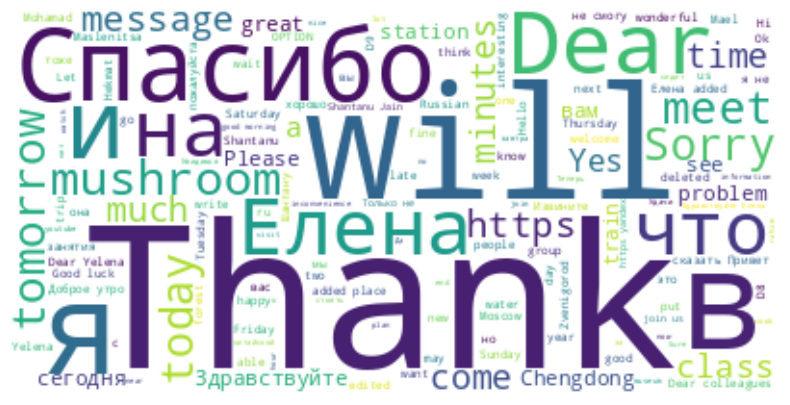

In [37]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()